1) 퍼셉트론

1. 퍼셉트론

다수의 입력으로부터 하나의 결과를 내보내는 알고리즘이다.

가지돌기로 다수의 신호를 받고, 일정 크기 이상이 되면 축삭돌기를 통해 신호를 전달한다.

* 즉 입력값(x) 여러개가 각각의 가중치(w, 축삭돌기)에 곱해져서 임계치를 넘을 때, 뉴런은 1을 출력값(y, 뉴런)으로 전달한다.
* 임계치 기준 못넘으면 0, 넘으면 1이므로 계단 함수의 형태를 띄게 된다.

가중치가 클 수록 입력값이 중요하다는 의미이다.

활성화 함수: 뉴런에서 출력값을 변형시키는 함수 (=wx+b)

계단 함수 외에도 다양하게 (시그모이드 함수, 소프트맥스 함수 등) 사용된다.

로지스틱 회귀 모델의 경우 인공 신경망에서는 하나의 인공 뉴런으로 볼 수 있고, 퍼셉트론의 활성화 함수를 시그모이드 함수로 변경하면 퍼셉트론은 이진 분류를 수행하는 로지스틱 회귀와 동일하게 된다.

2. 단층 퍼셉트론

단층 퍼셉트론: 입력층 - 출력층 두 단계로 이루어지는 퍼셉트론

In [ ]:
def AND_gate(x1, x2):
  w1 = 0.5
  w2 = 0.5
  b = -0.7 
  # (w1, w2, b) 쌍은 다양할 것
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else: 
    return 1

AND_gate(0,0), AND_gate(0,1), AND_gate(1,0), AND_gate(1,1)  

# AND gate: 두 개의 입력값이 모두 1일 경우에만 출력값이 1이 나오는 게이트.

(0, 0, 0, 1)

In [ ]:
def NAND_gate(x1,x2):
  w1 = -0.5
  w2 = -0.5
  b = 0.7
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else:
    return 1

NAND_gate(0,0), NAND_gate(0,1), NAND_gate(1,0), NAND_gate(1,1)  
# 두 개의 입력값이 1이 아닌 경우에만 1이 나오는 게이트

(1, 1, 1, 0)

In [ ]:
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)


(0, 1, 1, 1)

XOR gate: 단층 퍼셉트론으로 구현할 수 없다.

입력값 두 개가 서로 다를때만 출력값이 1인 게이트.

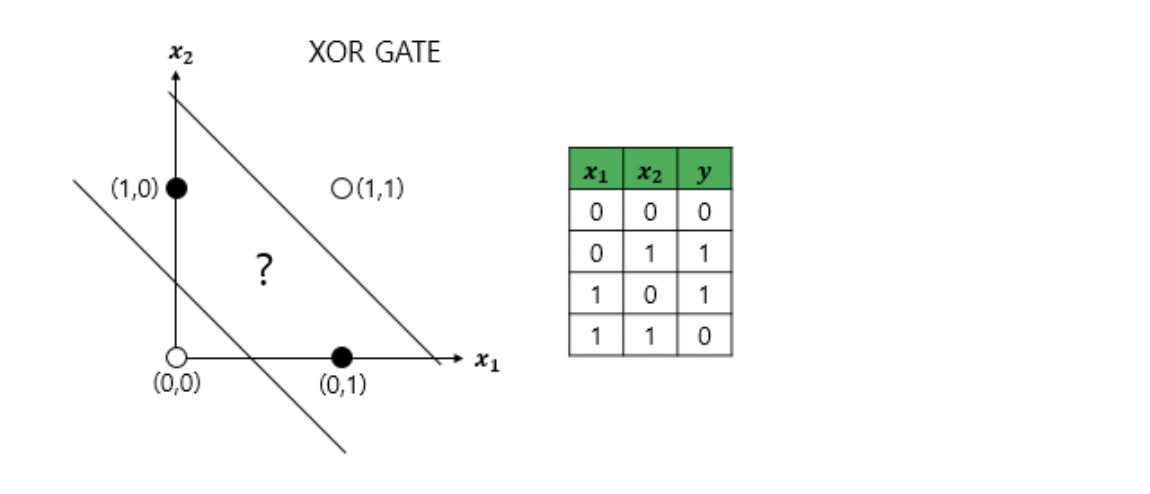

하얀색 원(0 출력)과 검은색 원(1 출력)을 분리하려면 최소 두 선이 필요하다.

즉 다층 퍼셉트론을 활용해야 한다.

다층 퍼셉트론(MLP, multi layer perceptron)은, 기존 입력층-출력층 사이에 은닉층(hidden layer)을 추가해준다.

은닉층이 2개 이상인 신경망을 심층 신경망이라고 한다.

지금까지는 퍼셉트론이 정답을 출력할 때까지 수동으로 가중치를 찾았다면, 이제는 기계가 스스로 찾아내도록 자동화시켜야 한다 (학습 / 손실 함수, 옵티마이저 사용).

학습시키는 인공 신경망 = 심층 신경망일 경우,
이를 **딥러닝**이라고 한다.

02) 인공 신경망 훑어보기

1. 피드 포워드 신경망 (FFNN, feed- forward neural network) 

입력층 -> 출력층 방향으로 연산이 전개되는 신경망

ex. RNN: 은닉층에서 출력층으로도 나가지만, 다시 은닉총의 입력으로도 사용되는 순환 신경망



2. 전결합층 (FC, fully connected layer, dense layer)

어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있는 층



3. 활성화 함수



(1) 특징1 - 비선형 함수

f(x) = wx + b는 선형 함수, 직선 1개로는 그릴 수 없는 함수는 비선형 함수이다.

ex ) 계단 함수

선형 함수에 은닉층을 계속해서 추가하면 (능력 향상), y = f(f(f(x)))꼴이 되는데, 이는 결국 y = w^3x꼴로 표현되고 1회 추가한 것과 다름없다.

새로운 가중치는 생기긴 하므로, 사용되는 함수에 따라 은닉층을 선형층(선형함수)과 비선형층으로 구분하기도 한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


(2) 계단 함수

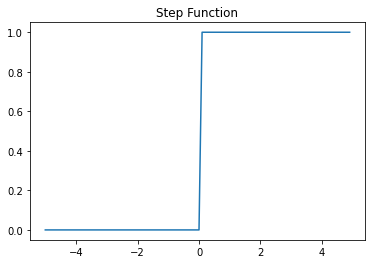

In [ ]:
def step(x):
  return np.array(x > 0, dtype=np.int) 
x = np.arange(-5.0, 5.0, 0.1)
y = step(x) # y는 x > 0인 부분
plt.title('Step Function')
plt.plot(x,y)
plt.show()

3. 시그모이드 함수

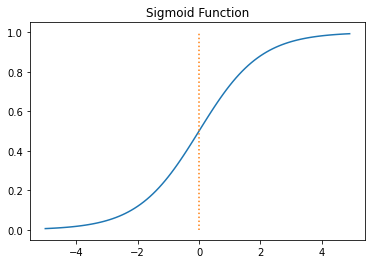

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.title('Sigmoid Function')
plt.plot([0,0], [0.0,1.0], ':')
plt.show()

활성화 함수를 시그모이드 함수로 사용하면, 입력에 대해서 순전파 연산을 하고, 예측값과 실제값의 오차를 손실 함수를 통해 계산하고, 손실을 미분을 통해서 기울기를 구하고, 이를 통해 역전파(w 다시 구하기)를 수행한다.

그러나 역전파를 계속 구하게 되면, 0에 가까운 미분값이 계속해서 곱해지므로 w가 제대로 업데이트되지 않는다. 이를 미분값 소실이라고 한다.

즉 활성화 함수로 시그모이드 함수를 사용하는 것은 적절하지 않다.

4. 하이퍼볼릭탄젠트 함수

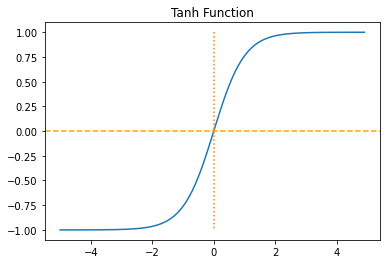

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) 
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

# 미분 시 최대값은 1로, 그나마 시그모이드 함수보다 선호된다. (-1~1 값 반환)

5. 렐루 함수

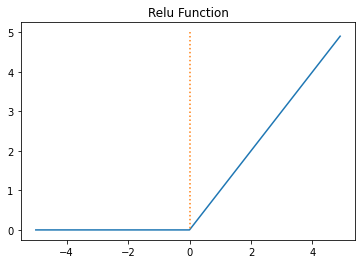

In [ ]:
def relu(x):
    return np.maximum(0, x) # 음수 입력시 0, 양수 입력시 그대로

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

렐루 함수는 입력값이 양수일 경우 그대로 출력 (y=x) -> 미분값이 항상 1, 간결하고 매우 선호되는 활성화 함수

그러나 음수 입력 시 기울기 0, 회생이 어렵다.
(죽은 렐루)

(6) 리키 렐루 (Leaky ReLu)



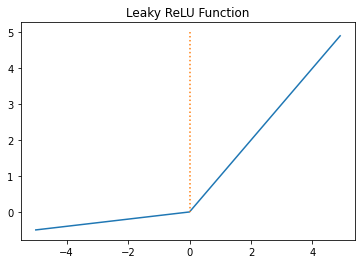

In [ ]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

음수 입력 시 기울기 0을 방지하고자 하이퍼파라미터 a 추가 (주로 0.1)

소프트맥스 함수 : 사용 안하는 것은 아님.

이진 분류 - 시그모이드 함수
다중 분류 (세가지 이상 선택지) - 소프트맥스 함수

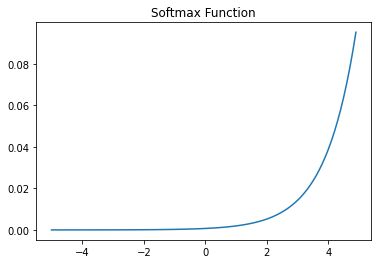

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) 
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

03) 행렬곱과 신경망

1. 행렬곱으로 순전파 이해하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=3, activation='Softmax'))

In [ ]:
model.summary()
# 매개변수 8개 - 3x2 (w) + 2 (b)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(8, input_dim=4, activation='relu')) # 4-8
model.add(Dense(8, activation='relu')) # 8-8
model.add(Dense(3, activation='softmax')) # 8-3
# 괄호 안의 수 = 뉴런의 수

손실함수 종류



In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# 선형 회귀

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
# 이진 분류 (시그모이드 함수)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# 다중 분류 (소프트맥스 함수)

배치 - 얼만큼의 데이터로 매개 변수의 값을 조정하는지

사람으로 치면, 문제를 몇 개씩 풀고 정답을 확인(=옵티마이즈)하는지

ex. 2000문제를 200개 단위로 풀고 채점
 
batch_size = 200

배치의 수 = iteration (10), 즉 한 번의 에포크 당 매개변수를 10번 업데이트한다는 뜻


In [ ]:
model.fit(X_train, y_train, batch_size=len(train_X))
# 배치 경사 하강법 (전체 데이터 고려, 시간 오래걸림)

In [ ]:
model.fit(X_train, y_train, batch_size=1)
# 확률적 경사 하강법 (배치 크기 1, 불안정)

In [ ]:
model.fit(X_train, y_train, batch_size=32)
# 미니 배치 경사 하강법 (정해진 양만 계산, 안정적)

옵티마이저 종류

In [ ]:
import tensorflow as tf
tf.keras.optimizers.SGD(lr = 0.01, momentum=0.9)
# 모멘텀 - 계산된 기울기마다 한 시점 전의 기울기를 일정 비율 반영
# 기울기가 0이 되어도 관성의 힘으로 넘어서는 효과

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)
# 아다그라드 - 매개변수별로 의미가 다르므로, 각자 다른 학습률 적용
# 변화 큰 매개변수일수록 학습률 적게 설정

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [ ]:
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
# 알엠에스프롭 - 아다그라드 단점 (나중에는 학습률 떨어짐) 보완

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# 아담 - 알엠에스프롭 + 모멘텀

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


에포크 - 학습 방법이 다양하다.

과적합 방지 : 불필요한 패턴들까지 학습 방지



가중치 규제하기 (복잡한 모델을 간단하게)

L1 규제: 모든 가중치에 λ|w| 더함
L2 규제: 모든 가중치에 1/2λw^2 더함

즉 중요하지 않은 특성들은 거의 사용하지 않게 된다. 

* L1의 경우 최소화 과정에서 w도 작아짐(최대 0), 
* 어떤 특성이 모델에 영향을 주고, 안주는지 파악 가능

L2의 경우 최소화해도 0에 가까운 값, 더 잘 작동함



드롭아웃 - 신경망(줄기) 일부를 사용하지 않는 방법 (학습시에만 사용)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

max_words = 10000
num_classes=46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

기울기 소실 / 폭주 방지하기

1. 은닉층에 시그모이드/하이퍼볼릭탄젠트 대신 렐루/ 리키 렐루 함수 사용하기

2. 그래디언트 클리핑 (기울기 자르기)

In [ ]:
import tensorflow as tf
from tf.keras import optimizers
Adam = optimizers.Adam(lr=0.0001, clipnorm = 1.) # 기울기 1을 넘지 못함

3. 가중치 초기화

1) 세이비어 초기화 (S자 형태 활성화 함수와 사용)

W : -sqrt(6/nin+nout), +sqrt(6/nin+nout) 사이의 균등 분포로 균형을 맞춤

 초기화 시 평균 0, 표준편차 sqrt(2/nin+nout)


2) He 초기화 (relu + He 초기화가 보편적)

W : W : -sqrt(6/nin), +sqrt(6/nin) 사이의 균등 분포 -> 다음 층의 뉴런수를 반영x

초기화 시 평균 0, 표준편차 sqrt(2/nin)

4. 배치 정규화

1) 내부 공변량 변화: 신경망 층 사이에서 이전 층의 학습으로, 현재 층의 분포와 전달되는 분포 간 차이가 발생하는 현상

2) 배치 정규화: 학습 시 배치 단위의 평균, 분산들을 받아 이동평균/이동분산을 저장하고, 테스트 시 해당 배치가 아닌 저장된 정보로 정규화

***** 케라스 훑어보기 *****

In [ ]:
# keras - 딥러닝을 위한 파이썬 라이브러리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# pad_sequences : 모델의 입력으로 사용하려면 모든 샘플의 길이가 동일해야 할 수 있음.
# 패딩작업

In [ ]:
pad_sequences([[1,2,3],[2,3,4,5,6],[7,8]], maxlen=3, padding='pre')
# 길 경우 자름, 짧을 경우 0으로 채움 (pre-앞, post-뒤)
# 

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

In [ ]:
tokenizer = Tokenizer()
fit_text = 'The earth is an awesome place live'
tokenizer.fit_on_texts([fit_text])

test_text = 'The earth is an great place live'
sequences = tokenizer.texts_to_sequences([test_text])

print('정수 인코딩: ', sequences) # great는 단어집합에 없으므로 출력되지 않는다.
print('단어 집합: ', tokenizer.word_index)

정수 인코딩:  [[1, 2, 3, 4, 6, 7]]
단어 집합:  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


워드 임베딩: 단어들을 밀집 벡터로 만드는 것
* 희소 벡터: 원-핫 벡터(0,0,...1,0,0,...), 고차원, 수동학습
* 밀집 벡터: 실수값, 저차원, 자동학습

Embedding()은 각 인덱스별 임베딩 벡터를 리턴한다.(임의, 이후 학습으로 변화됨)

In [ ]:
# 예시
tokenized_text = [['Hope','to','see','you','soon'], 
                  ['Nice','to','see','you','again']]
encoded_text = [[0,1,2,3,4], [5,1,2,3,6]]

vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

# vocab_size: 총 단어 개수
# embedding_dim: 임베딩 벡터의 출력 차원
# input_length: 입력 시퀀스의 길이

In [ ]:
model = Sequential() 
model.add(Dense(1, input_dim=3, activation='relu')) # 전결합층 추가
model.add(Embedding(vocab_size, output_dim, input_length)) # 임베딩 층 또한 추가해줘야

- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
- sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- softmax : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- relu : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu')) # 3-1

In [ ]:
model.add(Dense(8, input_dim=4, activation='relu')) 
# 추가(은닉층)할 땐 8은 은닉층의 뉴런이다.
model.add(Dense(1, activation='sigmoid'))
# input_dim 필요없음 (이미 8)

# 4-8-1 형태

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
 dense_1 (Dense)             (None, 8)                 16        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


compile - 모델을 기계가 이해할 수 있도록 편집

In [ ]:
# RNN을 통한 이진 분류 (9챕터)
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


옵티마이저-활성화함수 조합

회귀: mse

다중클래스 분류(ex.로이터뉴스 분류): categorical_crossentropy - softmax

이진 분류(ex.리뷰 감성 분류): binary_crossentropy - sigmoid

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, 
          verbose=0, validation_data(X_val, y_val))
# fit(): 모델을 학습한다.
# X_train: 훈련 데이터 / y_train: 레이블 데이터
# validation_data(X_val, y_val): 검증 데이터로 훈련이 잘되고 있는지 보여줌 (loss가 다시 커지면 과적합)
# validation_split=0.2: 훈련 데이터 일부 분리해서 검증용으로 사용
# verbose 0: 출력x, 1: 진행 막대 보여줌, 2: 손실 정보 출력

평가와 예측

In [ ]:
model.evaluate(X_test, y_test, batch_size=32)
# 정확도 평가
model.predict(X_input, batch_size=32)
# 예측

저장과 로드

In [ ]:
model.save('model_name')
from tensorflow.keras.models import load_model
model = load_model('model_name')

Sequential API vs Functional API

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
# sequential API - 단순 층쌓기, 복잡한 신경망 구현불가

1) 전결합 피드 포워드 신경망 (fully connected FFNN)

In [ ]:
# 입력 데이터의 크기를 인자로, 입력층 먼저 정의해줘야
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(10,)) # 10개의 입력을 받는 입력층

In [ ]:
hidden1 = Dense(64, activation='relu')(inputs) 
# dense = Dense(64, activation='relu')일 때 dense(inputs)와 동일
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)

In [ ]:
model = Model(inputs=inputs, outputs = output)

정리

1. Input()함수에 입력 크기 정의

2. 이전층을 다음층 함수의 입력으로 사용, 변수에 할당

3. Model() 함수에 입/출력 정의

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# 변수명을 통일한다면
inputs = Input(shape=(10,))
x = Dense(8, activation='relu')(inputs)
x = Dense(4, activation='relu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs, x)

선형 회귀

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1,2,3,4,5,6,7,8,9] # 공부시간
y = [11,22,33,44,53,66,77,87,95] # 공부시간별 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer = sgd, loss='mse', metrics=['mse'])
linear_model.fit(X,y,epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 0s 463ms/step - loss: 2891.9795 - mse: 2891.9795
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 356.8494 - mse: 356.8494
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 44.9200 - mse: 44.9200
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 6.5387 - mse: 6.5387
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 1.8155 - mse: 1.8155
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2336 - mse: 1.2336
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1614 - mse: 1.1614
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1518 - mse: 1.1518
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1500 - mse: 1.1500
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1491 - mse: 1.1491
Epoch 11/300
1/1 [==============================] - 0s 6ms/step -

로지스틱 회귀

In [ ]:
inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

다중 입력을 받는 모델도 설계 가능!

In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

x = Dense(16, activation='relu')(inputA)
x = Dense(8, activation='relu')(x)
x = Model(inputs = inputA, outputs = x)

y = Dense(64, activation='relu')(inputB)
y = Dense(32, activation='relu')(y)
y = Dense(8, activation='relu')(y)
y = Model(inputs=inputB, outputs=y)

# 두 개의 인공 신경망의 출력값을 연결 (concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation='relu')(result)
z = Dense(1, activation='linear')(z)

model = Model(inputs=[x.input, y.input], outputs=z)
# 두 개의 입력층으로 분기되어 진행, 마지막에는 하나의 출력 예측

RNN 은닉층 사용하기 (다음 챕터 자세히)

In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)

Keras Subclassing API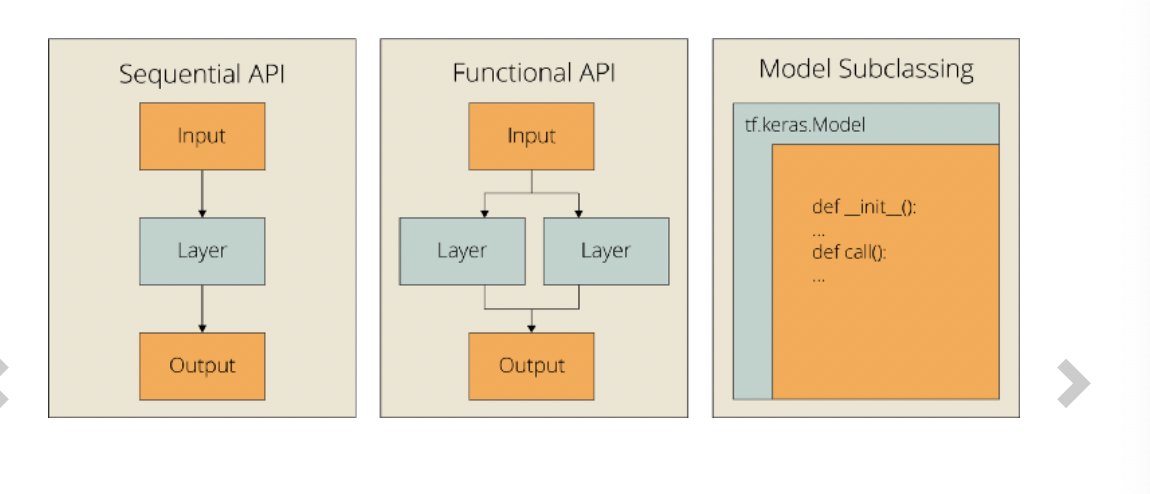

subclassing API로 구현한 선형 회귀 : 객체 지향 프로그래밍 이용, 더 어려운 모델들 구현 가능

다층 퍼셉트론

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [4]:
print(tokenizer.texts_to_matrix(texts, mode='count'))
# 어떤 모드이든지 단어 순서는 보존되지 않는다.

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [5]:
print(tokenizer.texts_to_matrix(texts, mode='binary'))
# 단어 유무만 파악

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [7]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [8]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2))
# 등장횟수 / 단어수

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


20newsgroups

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.utils import to_categorical

In [3]:
newsdata = fetch_20newsgroups(subset = 'train')
# 훈련 데이터만 다운로드 (all : 모든 샘플)

In [4]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [5]:
print(newsdata.target_names)
# 실습의 목적: 훈련 데이터 중 본문을 보고 어떤 주제인지 맞추는 것

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
print(newsdata.target[0])
print(newsdata.target_names[7])

7
rec.autos


첫번째 샘플의 주제는 rec.autos이다.

In [7]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [9]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [10]:
data.isnull().values.any()

False

In [13]:
print(data['email'].nunique())
print(data['target'].nunique())
# 중복 제거한 개수

11314
20


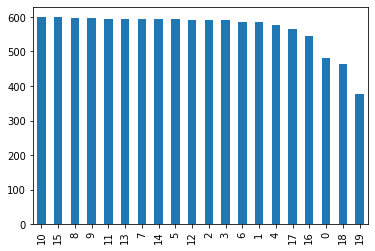

In [14]:
data['target'].value_counts().plot(kind='bar')

In [17]:
print(data.groupby('target').size())

target
0     480
1     584
2     591
3     590
4     578
5     593
6     585
7     594
8     598
9     597
10    600
11    595
12    591
13    594
14    593
15    599
16    546
17    564
18    465
19    377
dtype: int64


In [18]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [19]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [20]:
max_words = 10000
num_classes = 20

In [21]:
def prepare_data(train_data, test_data, mode):
  tokenizer = Tokenizer(num_words = max_words)
  tokenizer.fit_on_texts(train_data)
  X_train = tokenizer.texts_to_matrix(train_data, mode=mode)
  X_test = tokenizer.texts_to_matrix(test_data, mode=mode)
  return X_train, X_test, tokenizer.index_word

In [22]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

In [23]:
index_to_word[1]

'the'

다층 퍼셉트론 사용하여 텍스트 분류하기

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
  model = Sequential()
  model.add(Dense(256, input_shape=))